In [1]:
#install packages
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

# Tickers
Basket1 = "BTC-USD"
Basket2 = ['ETH-USD', 'USDT-USD', 'XRP-USD', 'BNB-USD', 'USDC-USD', 'SOL-USD', 
           'DOGE-USD', 'TRX-USD', 'ADA-USD', 'STETH-USD', 'WBTC-USD', 'LEO-USD', 
           'LINK-USD', 'USDS-USD', 'AVAX-USD', 'TON-USD', 'HBAR-USD', 'XLM-USD', 
           'SUI-USD', 'SHIB-USD', 'WSTETH-USD', 'OM-USD', 'BCH-USD', 'LTC-USD', 'DOT-USD']

# Download the data for the basket
tickers = [Basket1] + Basket2  # Include Bitcoin and the basket of other tickers
data = yf.download(tickers, start="2016-01-01")['Close']  # Use 'Close' prices

# Compute log returns
log_rets = np.log(data / data.shift(1)).dropna()

# Now calculate the correlation matrix
corr_matrix = log_rets.corr()
print(corr_matrix)




YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  26 of 26 completed


Ticker       ADA-USD  AVAX-USD   BCH-USD   BNB-USD   BTC-USD  DOGE-USD  \
Ticker                                                                   
ADA-USD     1.000000  0.784228  0.737064  0.740927  0.778313  0.656294   
AVAX-USD    0.784228  1.000000  0.727491  0.777986  0.777963  0.601402   
BCH-USD     0.737064  0.727491  1.000000  0.718076  0.801230  0.630363   
BNB-USD     0.740927  0.777986  0.718076  1.000000  0.811680  0.625216   
BTC-USD     0.778313  0.777963  0.801230  0.811680  1.000000  0.659128   
DOGE-USD    0.656294  0.601402  0.630363  0.625216  0.659128  1.000000   
DOT-USD     0.827065  0.820589  0.768184  0.770691  0.789741  0.633583   
ETH-USD     0.783878  0.812504  0.792398  0.819123  0.892249  0.683983   
HBAR-USD    0.727264  0.733415  0.688471  0.675961  0.749797  0.556770   
LEO-USD     0.176724  0.235959  0.200738  0.232350  0.215415  0.176863   
LINK-USD    0.803417  0.789261  0.739485  0.749467  0.757014  0.607182   
LTC-USD     0.732710  0.707482  0.7611

<Axes: title={'center': 'Cumulative Sum of Log Returns for Non-BTC Cryptos'}, xlabel='Date'>

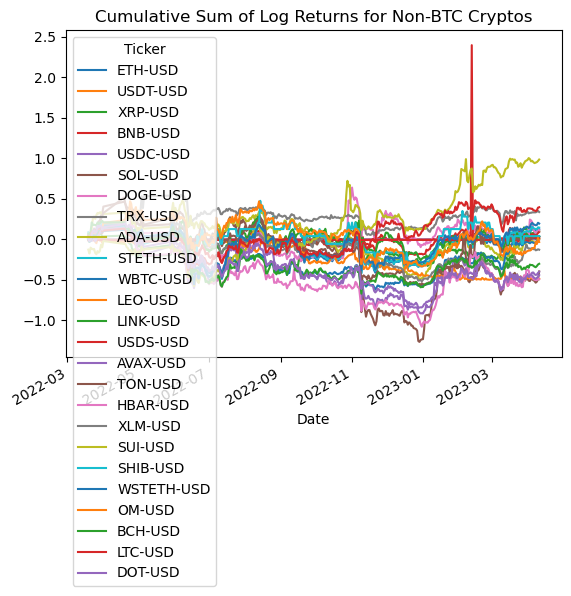

In [5]:
# Define independent (X) and dependent (Y) variables
X = log_rets[Basket2]  # Basket of cryptos
Y = log_rets[Basket1]  # BTC returns
X.cumsum().plot(title = "Cumulative Sum of Log Returns for Non-BTC Cryptos") #Cumsum of basket

<Axes: title={'center': 'Cumulative Sum of Log Returns for BTC'}, xlabel='Date'>

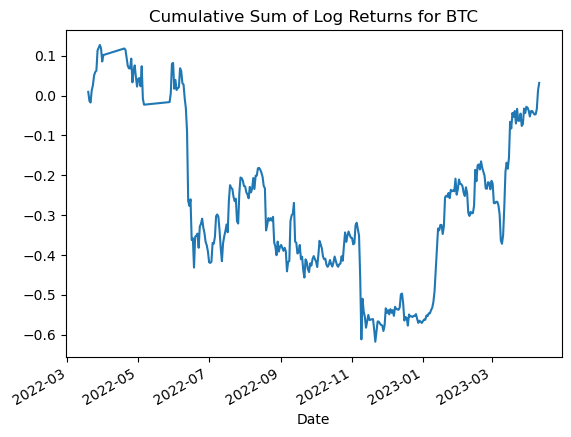

In [7]:
Y.cumsum().plot(title = "Cumulative Sum of Log Returns for BTC") #cumsum of BTC

In [9]:
#Add constant and drop na values
X = sm.add_constant(X)
print (X)
print (Y)
X = X.dropna()
Y = Y.dropna()


            const   ETH-USD  USDT-USD   XRP-USD   BNB-USD  USDC-USD   SOL-USD  \
Date                                                                            
2022-03-19    1.0  0.000310  0.000027  0.026098  0.005537 -0.000100  0.028493   
2022-03-20    1.0 -0.029553 -0.000083 -0.016306 -0.022983  0.000184 -0.042024   
2022-03-21    1.0  0.013031 -0.000080  0.038966  0.014429 -0.000104  0.001605   
2022-03-22    1.0  0.025603 -0.000010 -0.001260  0.019650  0.000076  0.019589   
2022-03-23    1.0  0.019299  0.000072  0.000943  0.010566  0.000049  0.049464   
...           ...       ...       ...       ...       ...       ...       ...   
2023-04-07    1.0 -0.003898  0.000079  0.020527 -0.005633  0.000059 -0.006825   
2023-04-08    1.0 -0.008688 -0.000209 -0.015734 -0.000208 -0.000236 -0.021404   
2023-04-09    1.0  0.005333  0.000034  0.000233  0.007177 -0.000074  0.013041   
2023-04-10    1.0  0.027488 -0.000021  0.024380  0.017448 -0.000028  0.028310   
2023-04-11    1.0 -0.010001 

In [11]:
#Run regression and get results
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BTC-USD   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5666.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:21:52   Log-Likelihood:                 1786.3
No. Observations:                 351   AIC:                            -3521.
Df Residuals:                     325   BIC:                            -3420.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.512e-06   8.39e-05     -0.078      0.938      -0.000       0.000
ETH-USD        0.0358      0.020      1.777      0.076      -0.004       0.076
USDT-USD       0.3502      0.268      1.305      0.193      -0.178       0.878
XRP-USD       -0.0010      0.004     -0.228      0.820      -0.009       0.007
BNB-USD       -0.0055      0.006     -0.948      0.344      -0.017       0.006
USDC-USD       0.2648      0.055      4.824      0.000       0.157       0.373
SOL-USD       -0.0046      0.002     -1.849      0.065      -0.009       0.000
DOGE-USD       0.0014      0.002      0.566      0.572      -0.003       0.006
TRX-USD       -0.0030      0.003     -0.871      0.385      -0.010       0.004
ADA-USD       -0.0009      0.004     -0.199      0.842      -0.009       0.008
STETH-USD     -0.0247      0.013     -1.832      0.068      -0.051       0.002
WBTC-USD       1.0137      0.007    141.219      0.000       1.000       1.028
LEO-USD       -0.0038      0.003     -1.223      0.222      -0.010       0.002
LINK-USD      -0.0037      0.004     -0.946      0.345      -0.011       0.004
USDS-USD       0.0003      0.000      0.554      0.580      -0.001       0.001
AVAX-USD       0.0039      0.004      1.118      0.264      -0.003       0.011
TON-USD        0.0005      0.002      0.205      0.838      -0.004       0.005
HBAR-USD    1.558e-05      0.003      0.005      0.996      -0.007       0.007
XLM-USD        0.0082      0.006      1.362      0.174      -0.004       0.020
SUI-USD       -0.0002      0.002     -0.096      0.924      -0.005       0.004
SHIB-USD       0.0035      0.002      1.663      0.097      -0.001       0.008
WSTETH-USD    -0.0157      0.017     -0.946      0.345      -0.048       0.017
OM-USD         0.0008      0.003      0.301      0.764      -0.005       0.006
BCH-USD       -0.0007      0.004     -0.169      0.866      -0.009       0.007
LTC-USD       -0.0007      0.004     -0.194      0.846      -0.008       0.007
DOT-USD       -0.0088      0.005     -1.822      0.069      -0.018       0.001
==============================================================================
Omnibus:                       62.819   Durbin-Watson:                   2.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              847.756
Skew:                          -0.080   Prob(JB):                    8.17e-185
Kurtosis:                      10.612   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Use the new basket as predictor
Z = log_rets['Basket_Rets']
X_modify = sm.add_constant(Z)

# Align Y and X_modify to have the same index (dates)
Y_aligned, X_aligned = Y.align(X_modify, join='inner')

# Run the regression
results_modify = sm.OLS(Y_aligned, X_aligned).fit()

# Print results
print(results_modify.summary())
print(results_modify.params)
print(results_modify.tvalues)



                            OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1298.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.43e-116
Time:                        14:42:21   Log-Likelihood:                 942.72
No. Observations:                 333   AIC:                            -1881.
Df Residuals:                     331   BIC:                            -1874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0001      0.001     -0.158      

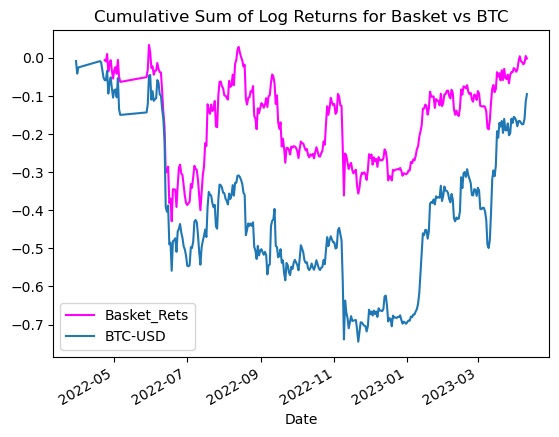

In [47]:
#Plot cumsum log rets of BTC vs Basket
Z.cumsum().plot(color = "magenta")
Y.cumsum().plot(title = "Cumulative Sum of Log Returns for Basket vs BTC")
plt.legend()


Sharpe Ratio: 0.5974665057722413


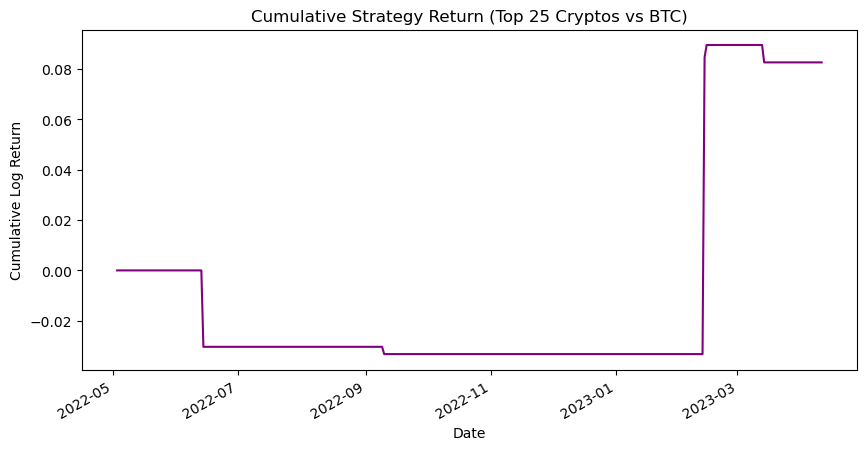

In [67]:

# Calculate the synthetic basket returns
log_rets['Basket_Rets'] = log_rets[Basket2].mean(axis=1)

# Calculate Z-score of the spread (between BTC and the basket)
spread = log_rets["BTC-USD"] - log_rets["Basket_Rets"]
z_score = (spread - spread.mean()) / spread.std()
log_rets["Z_Score"] = z_score

# Define entry/exit points
entry_threshold = 3.0 
exit_threshold = 0.5   

# Generate trading signals
log_rets["Signal"] = 0
log_rets.loc[log_rets["Z_Score"] > entry_threshold, "Signal"] = -1  # Short BTC
log_rets.loc[log_rets["Z_Score"] < -entry_threshold, "Signal"] = 1   # Long BTC
log_rets.loc[log_rets["Z_Score"].abs() < exit_threshold, "Signal"] = 0  

# Forward fill the signals to maintain positions until exit
log_rets["Signal"] = log_rets["Signal"].ffill()

# Strategy returns: long/short BTC based on signals, while the basket is held opposite
log_rets["Strategy_Return"] = log_rets["Signal"].shift(1) * (log_rets["BTC-USD"] - log_rets["Basket_Rets"])

# Drop any NaNs from the strategy returns
log_rets = log_rets.dropna()

# Calculate the Sharpe ratio
mean_return = log_rets["Strategy_Return"].mean()
std_return = log_rets["Strategy_Return"].std()
sharpe_ratio = (mean_return / std_return) * np.sqrt(252)

# Print Sharpe ratio
print("Sharpe Ratio:", sharpe_ratio)

# Plot cumulative strategy returns
log_rets["Strategy_Return"].cumsum().plot(color="purple", figsize=(10, 5))
plt.title("Cumulative Strategy Return (Top 25 Cryptos vs BTC)")
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.show()



            const  STETH-USD
Date                        
2022-05-03    1.0  -0.027608
2022-05-04    1.0   0.049153
2022-05-05    1.0  -0.064823
2022-05-06    1.0  -0.015850
2022-05-28    1.0   0.046811
...           ...        ...
2023-04-07    1.0  -0.004148
2023-04-08    1.0  -0.007345
2023-04-09    1.0  -0.003680
2023-04-10    1.0   0.025986
2023-04-11    1.0  -0.003453

[323 rows x 2 columns]
Date
2022-05-03   -0.020422
2022-05-04    0.050313
2022-05-05   -0.081941
2022-05-06   -0.014714
2022-05-28    0.006522
                ...   
2023-04-07   -0.004227
2023-04-08    0.000785
2023-04-09    0.013691
2023-04-10    0.045534
2023-04-11    0.019439
Name: BTC-USD, Length: 323, dtype: float64


const        -0.183399
STETH-USD    33.605219
dtype: float64

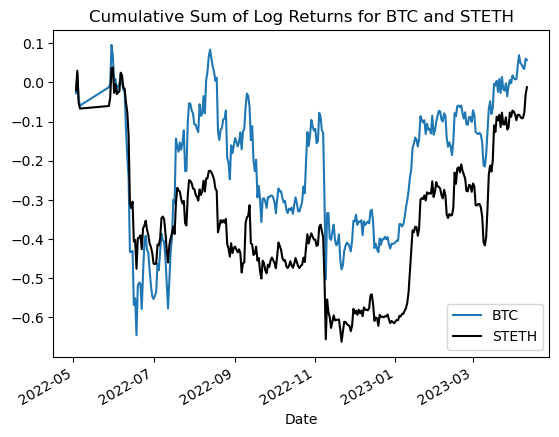

In [87]:
#Run similar regression for JUST STETH and BTC
X = log_rets['STETH-USD']  # STETH rets
Y = log_rets['BTC-USD']  # BTC rets
X.cumsum().plot(label="BTC") #Cumsum of BTC
Y.cumsum().plot(label="STETH", color = "black") #Cumsum of BTC
plt.title("Cumulative Sum of Log Returns for BTC and STETH")
plt.legend()
X = sm.add_constant(X)
print (X)
print (Y)
X = X.dropna()
Y = Y.dropna()
results = sm.OLS(Y, X).fit()
results.summary()
results.params
results.tvalues

Sharpe Ratio: 0.4546937775113148


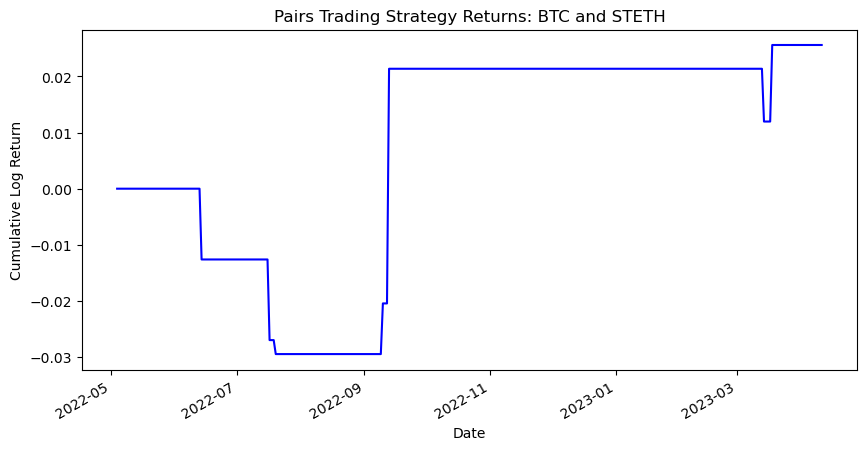

In [101]:
# Extract hedge ratio (beta on STETH-USD)
beta = results.params['STETH-USD']

# Calculate spread between BTC and weighted STETH
spread = Y - beta * log_rets['STETH-USD']

# Calculate z-score of the spread
z_score = (spread - spread.mean()) / spread.std()

# Define entry/exit points
entry_threshold = 3.0
exit_threshold = 0.5

# Generate signals
signals = pd.Series(0, index=z_score.index)
signals[z_score > entry_threshold] = -1  # Short BTC
signals[z_score < -entry_threshold] = 1  # Long BTC
signals[z_score.abs() < exit_threshold] = 0  

# Forward fill signals to hold positions until exit
signals = signals.ffill()

# Calculate strategy returns
strategy_returns = signals.shift(1) * spread

# Drop NaNs
strategy_returns = strategy_returns.dropna()

# Calculate Sharpe ratio
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
print("Sharpe Ratio:", sharpe_ratio)

# Plot cumulative returns
strategy_returns.cumsum().plot(figsize=(10,5), color='blue')
plt.title("Pairs Trading Strategy Returns: BTC and STETH")
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.show()


            const   ADA-USD
Date                       
2022-05-03    1.0 -0.013376
2022-05-04    1.0  0.151115
2022-05-05    1.0 -0.125501
2022-05-06    1.0 -0.009899
2022-05-28    1.0  0.020119
...           ...       ...
2023-04-07    1.0  0.001129
2023-04-08    1.0  0.005179
2023-04-09    1.0  0.010468
2023-04-10    1.0  0.018549
2023-04-11    1.0  0.011189

[323 rows x 2 columns]
Date
2022-05-03   -0.009248
2022-05-04    0.069918
2022-05-05   -0.074828
2022-05-06    0.000175
2022-05-28    0.020220
                ...   
2023-04-07    0.006408
2023-04-08   -0.019415
2023-04-09    0.003814
2023-04-10    0.008692
2023-04-11   -0.005159
Name: XLM-USD, Length: 323, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                XLM-USD   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     619.4
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           6.52e-77
Time:                        15:56:14   Log-Likelihood:                 790.58
No. Observations:                 323   AIC:                            -1577.
Df Residuals:                     321   BIC:                            -1570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.165      0.869      -0.002       0.002
ADA-USD        0.6942      0.028     24.888      0.000       0.639       0.749
==============================================================================
Omnibus:                       18.079   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.904
Skew:                           0.231   Prob(JB):                     1.31e-09
Kurtosis:                       4.681   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

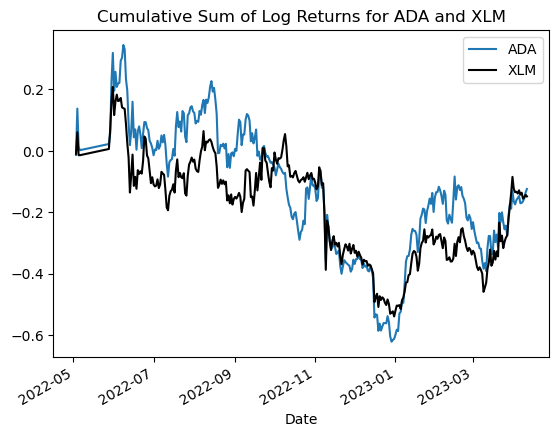

In [183]:
#Run similar regression for JUST ADA and XLM
X = log_rets['ADA-USD']  # ADA rets
Y = log_rets['XLM-USD']  # XLM rets
X.cumsum().plot(label="ADA") #Cumsum of ADA
Y.cumsum().plot(label="XLM", color = "black") #Cumsum of XLM
plt.title("Cumulative Sum of Log Returns for ADA and XLM")
plt.legend()
X = sm.add_constant(X)
print (X)
print (Y)
X = X.dropna()
Y = Y.dropna()
results = sm.OLS(Y, X).fit()
results.summary()


Sharpe Ratio: 1.5428352875629587


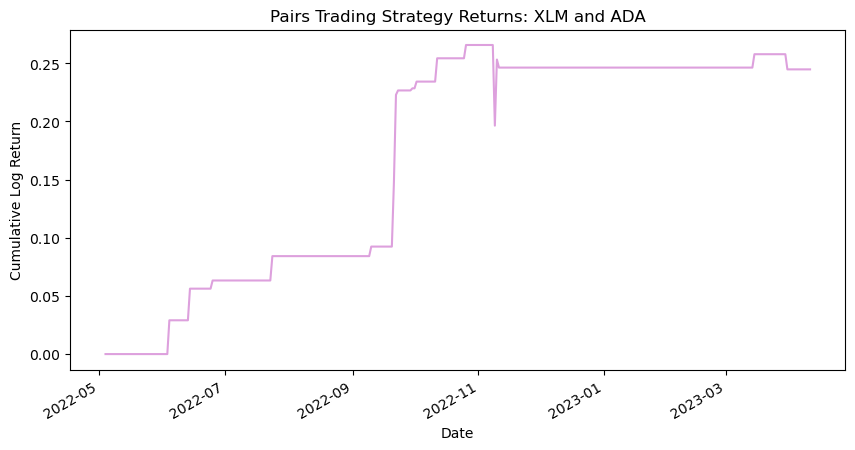

In [175]:
# Extract hedge ratio
beta = results.params['ADA-USD']

# Calculate spread
spread = Y - beta * log_rets['ADA-USD']

# Calculate z-score of the spread
z_score = (spread - spread.mean()) / spread.std()

# Define entry/exit points
entry_threshold = 2.0
exit_threshold = 2.0

# Generate signals
signals = pd.Series(0, index=z_score.index)
signals[z_score > entry_threshold] = -1  # Short XLM
signals[z_score < -entry_threshold] = 1  # Long XLM
signals[z_score.abs() < exit_threshold] = 0  

# Forward fill signals to hold positions until exit
signals = signals.ffill()

# Calculate strategy returns
strategy_returns = signals.shift(1) * spread

# Drop NaNs
strategy_returns = strategy_returns.dropna()

# Calculate Sharpe ratio
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
print("Sharpe Ratio:", sharpe_ratio)

# Plot cumulative returns
strategy_returns.cumsum().plot(figsize=(10,5), color='plum')
plt.title("Pairs Trading Strategy Returns: XLM and ADA")
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.show()


In [185]:
import statsmodels.api as sm

# Create Benchmark portfolio with top 25 Cyrptos
benchmark_returns = log_rets[tickers].mean(axis=1)

#Align benchmark and strategy 3 returns
combined = pd.concat([strategy_returns, benchmark_returns], axis=1).dropna()
combined.columns = ['Strategy', 'Benchmark']

#Run regression model
X = sm.add_constant(combined['Benchmark'])  # Add intercept (alpha)
Y = combined['Strategy']

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Strategy   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     28.06
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.20e-07
Time:                        10:03:53   Log-Likelihood:                 1119.1
No. Observations:                 322   AIC:                            -2234.
Df Residuals:                     320   BIC:                            -2227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      1.828      0.0

<Figure size 1000x500 with 0 Axes>

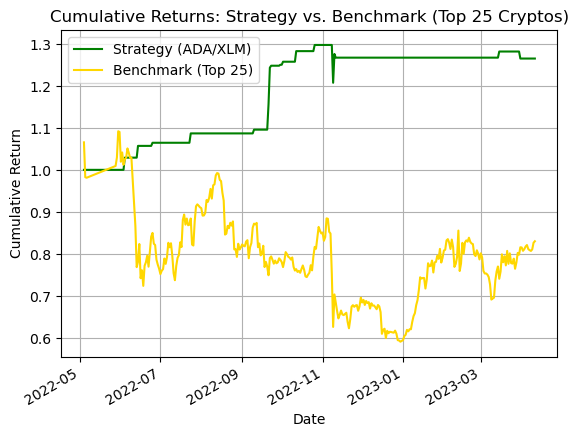

In [199]:
# Plot cumulative returns for Strategy vs. Benchmark
plt.figure(figsize=(10, 5))
(1 + combined).cumprod().plot(color=['green', 'gold'])
plt.title("Cumulative Returns: Strategy vs. Benchmark (Top 25 Cryptos)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend(['Strategy (ADA/XLM)', 'Benchmark (Top 25)'])
plt.show()

